## Properties of the exact solutions of TFIM and Heisenberg XXZ models

During the review process, one of the referees asked if the classifier we use can be replaced by simply measuring the magnetization of spins along some axis. While this is true for the Ising model, I doubt that this is the case for TFIM. In this notebook, I want to settle that.

In [1]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister
import time
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from functools import reduce
from itertools import cycle
from collections import deque
import scipy.sparse.linalg as SPLA
from scipy.sparse import csr_matrix


import sys
sys.path.append("..")

import Entangler
import TensorNetwork
import hamiltonians
import TNOptimize
import uuid
import json
import utils

plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'figure.figsize': [9, 6]})

In [2]:
X = np.array([[0, 1], [1, 0]])
Z = np.diag([1, -1])
Y = np.array([[0, -1j], [1j, 0]])
I = np.eye(2)

In [3]:
n_qubits = 10

mag_ops = []
local_pauli = Z
for i in range(n_qubits):
    mag_list = [local_pauli if j==i else I for j in range(n_qubits)]
    mag_ops.append(reduce(np.kron, mag_list))
#     print(X_mag_list)    

total_magnetization = reduce(np.add, mag_ops)

In [4]:
hs = np.linspace(-2.5, 2.5, num=41)
magnetizations = np.zeros(np.shape(hs))

### TFIM

In [5]:
for i, h in enumerate(hs):
    model = hamiltonians.ising_model(n_qubits, 1, h)
    H = hamiltonians.explicit_hamiltonian(model)
    H = csr_matrix(H)
    e, v = SPLA.eigsh(H, k=1, which="SA")
#     gs = hamiltonians.exact_gs(model)
    mag = v.conj().T @ total_magnetization @ v
    print(mag[0, 0].real)
    magnetizations[i] = mag[0, 0].real

-7.632783294297951e-16
1.3739009929736312e-15
2.7755575615628914e-17
2.220446049250313e-16
-7.840950111415168e-16
4.440892098500626e-16
3.469446951953614e-16
-6.175615574477433e-16
1.5265566588595902e-16
5.828670879282072e-16
-5.551115123125783e-16
1.3444106938820255e-15
8.326672684688674e-17
-6.952446431063297e-16
-6.418476861114186e-17
-8.023096076392733e-17
1.734723475976807e-16
4.0332320816460765e-17
-8.797284190183163e-18
1.2197274440461925e-18
-3.7209726701144668e-31
-7.535205098774256e-18
-3.209238430557093e-17
-1.734723475976807e-18
-7.632783294297951e-17
9.324138683375338e-17
-1.7719929256559963e-18
-1.8661829893906745e-16
-5.251875323519783e-16
-1.3877787807814457e-16
-2.862293735361732e-17
5.255670031123483e-17
-3.3306690738754696e-16
-2.914335439641036e-16
3.469446951953614e-16
-8.482797797526587e-16
-4.0939474033052647e-16
-3.3306690738754696e-16
-3.191891195797325e-16
-7.632783294297951e-16
-7.563394355258879e-16


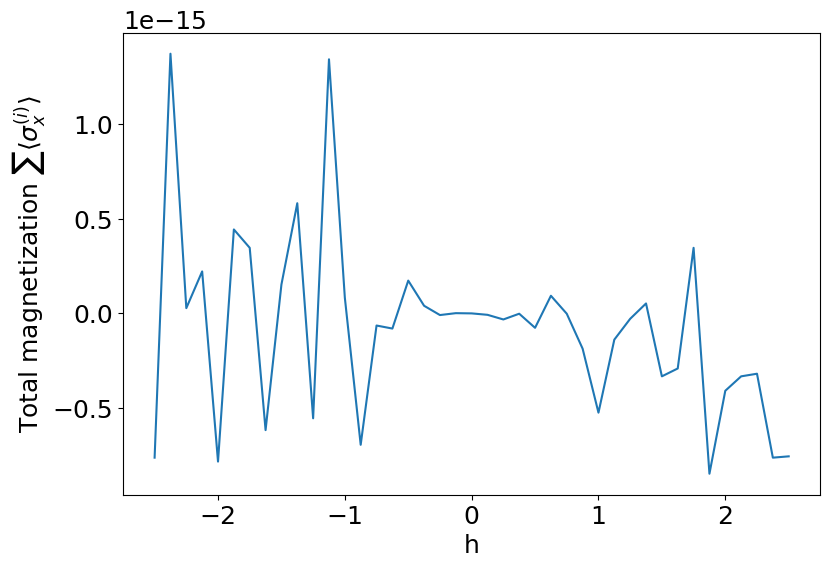

In [6]:
fig, ax = plt.subplots()
plt.plot(hs, magnetizations)
plt.xlabel("h")
plt.ylabel("Total magnetization $\sum \\langle \sigma_x^{(i)} \\rangle$")
fig.savefig('ising_x_magnetization.eps', format='eps', bbox_inches = 'tight')

### XXZ model

In [7]:
for i, h in enumerate(hs):
    model = hamiltonians.xxz_heisenberg_model(n_qubits, 1, h)
    H = hamiltonians.explicit_hamiltonian(model)
    H = csr_matrix(H)
    e, v = SPLA.eigsh(H, k=1, which="SA")
#     gs = hamiltonians.exact_gs(model)
    mag = v.conj().T @ total_magnetization @ v
    print(mag[0, 0].real)
    magnetizations[i] = mag[0, 0].real

-0.02827436241246062
-2.7652297783428614
0.6866153838437032
4.6651704579733195
-5.034611494043773
-5.338789178182497
-2.5482163855485096
1.8716102552804301
-1.6368640327850406
-5.466393546889588
8.225617250096619
-9.409410712049713
-0.21078912664508342
2.5827452256056865e-27
-1.2766028589511368e-28
4.063813339754675e-27
-3.261863047052603e-27
1.8587229221917223e-28
-8.507325473180901e-30
2.155609527329538e-28
2.09606228339713e-28
5.591749139931862e-30
-2.5737609291084654e-29
-7.568806394518376e-31
8.793827184166395e-31
-1.029511828899918e-31
3.5251970392365927e-31
2.2257052746931038e-30
-1.2526662078870696e-31
-6.303601541101162e-30
8.178910261068475e-32
-1.6913690251546774e-30
1.6062544415151378e-31
1.6122027749457005e-30
1.5630580932041952e-29
-1.2188340953869928e-31
1.8081284430592217e-32
2.2033013151856837e-30
1.5195736994959837e-32
4.2753712563553436e-31
3.0427933954306005e-30


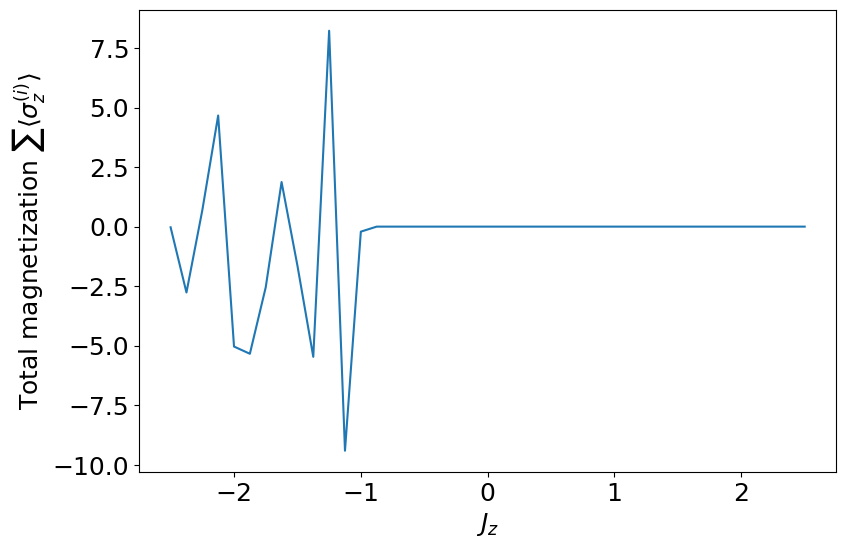

In [8]:
fig, ax = plt.subplots()
plt.plot(hs, magnetizations)
plt.xlabel("$J_z$")
plt.ylabel("Total magnetization $\sum \\langle \sigma_z^{(i)} \\rangle$")
fig.savefig('xxz_z_magnetization.eps', format='eps', bbox_inches = 'tight')

In [9]:
h = -2
model = hamiltonians.xxz_heisenberg_model(n_qubits, 1, h)
H = hamiltonians.explicit_hamiltonian(model)
H = csr_matrix(H)
es, vs = SPLA.eigsh(H, k=10, which="SA")
print(es)
for j in range(10):
    v = vs[:, j]
    mag = v.conj().T @ total_magnetization @ v
    print(mag.real)

[-20.         -20.         -16.         -15.23606798 -16.
 -15.23606798 -14.01721298 -14.01721298 -15.23606798 -15.23606798]
0.47923607359961107
-0.2996085688683967
-0.8684811403663206
2.2451948374632162
0.8686640613275658
-1.714244141040131
1.9810946847111586
-1.9780121419410592
-4.4505437286879905
3.36387195309495


In [10]:
np.shape(vs)

(1024, 10)